<a href="https://colab.research.google.com/github/rmtu14/ATM-/blob/main/GANwithoutCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU ({torch.cuda.get_device_name(0)}) is available.")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU.")


GPU is not available, using CPU.


In [2]:
import torch
import torch.nn
import math
import matplotlib
import torchvision


In [4]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Define the transforms
mnist_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to the range [-1, 1]
])

# Apply the transforms to the dataset
# Replace 'root' with the path where you want to store the MNIST dataset
train_dataset_transformed = MNIST(root='path/to/MNIST', train=True, transform=mnist_transform, download=True)
test_dataset_transformed = MNIST(root='path/to/MNIST', train=False, transform=mnist_transform, download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 105790344.67it/s]


Extracting path/to/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to path/to/MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19722516.09it/s]


Extracting path/to/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to path/to/MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28948290.73it/s]


Extracting path/to/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to path/to/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6837950.02it/s]


Extracting path/to/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to path/to/MNIST/MNIST/raw



In [5]:
import torch
from torch.utils.data import DataLoader

# Assuming you already have the transformed datasets: train_dataset_transformed
# Make sure to replace 'train_dataset_transformed' with your actual dataset variable

# Create DataLoader for training set
train_loader = DataLoader(
    dataset=train_dataset_transformed,
    batch_size=32,
    shuffle=True,
    num_workers=4  # You can adjust the number of workers for parallel data loading
)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


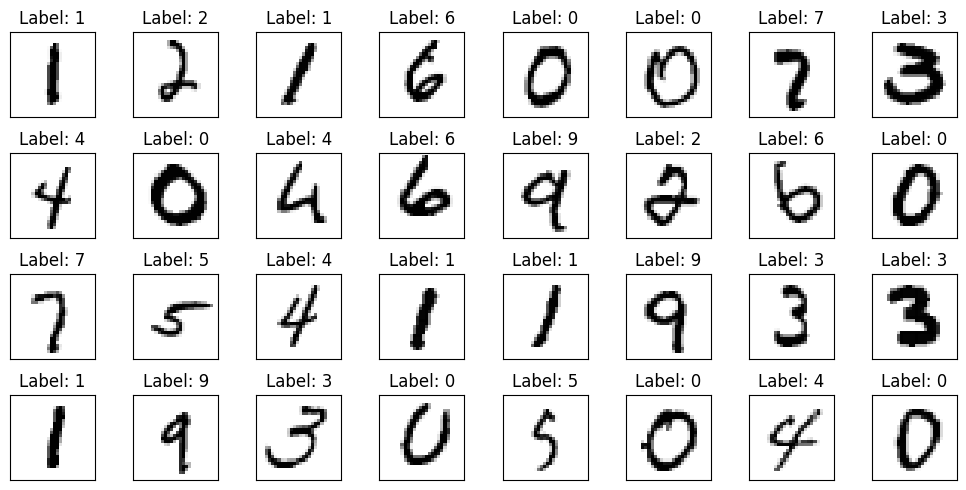

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assume train_loader is already defined
# Make sure to replace 'train_loader' with your actual DataLoader variable

# Get one batch from the DataLoader
for batch_idx, (images, labels) in enumerate(train_loader):
    # Plot the samples
    plt.figure(figsize=(10, 5))

    for i in range(32):  # Assuming batch size is 32
        plt.subplot(4, 8, i + 1)
        image = images[i].numpy().squeeze()
        plt.imshow(image, cmap='gray_r')
        plt.xticks([])  # Remove xticks
        plt.yticks([])  # Remove yticks
        plt.title(f'Label: {labels[i]}')

    plt.tight_layout()
    plt.show()

    # Break after the first batch for demonstration purposes
    break


In [7]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Example usage
# Assuming input_size is the size of the input features
input_size = 100  # Adjust this to your input size
discriminator = Discriminator(input_size)

# Create a random input tensor for demonstration
random_input = torch.randn((32, input_size))  # Assuming batch size is 32
output = discriminator(random_input)

# Print the output shape
print("Output Shape:", output.shape)


Output Shape: torch.Size([32, 1])


In [8]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Example usage
input_size = 100
discriminator = Discriminator(input_size)

# Move the discriminator to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
discriminator.to(device)

# Create a random input tensor for demonstration
random_input = torch.randn((32, input_size)).to(device)  # Assuming batch size is 32
output = discriminator(random_input)

# Print the output shape
print("Output Shape:", output.shape)


Output Shape: torch.Size([32, 1])


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Set parameters
input_size = 100
learning_rate = 0.001
epochs = 10

# Initialize discriminator, loss function, and optimizer
discriminator = Discriminator(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Move the discriminator to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
discriminator.to(device)

# Create a random input tensor for demonstration
random_input = torch.randn((32, input_size)).to(device)  # Assuming batch size is 32

# Forward pass
output = discriminator(random_input)

# Compute loss
labels = torch.randint(0, 2, (32, 1), dtype=torch.float).to(device)  # Assuming binary classification
loss = criterion(output, labels)

# Backward pass and optimization
optimizer.zero_grad()
loss.backward()
optimizer.step()

# Print the output shape
print("Output Shape:", output.shape)


Output Shape: torch.Size([32, 1])


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Set parameters
input_size = 28 * 28  # MNIST image size
learning_rate = 0.001
epochs = 10
batch_size = 32

# Create DataLoader for MNIST
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset_transformed = MNIST(root='path/to/MNIST', train=True, transform=mnist_transform, download=True)
train_loader = DataLoader(dataset=train_dataset_transformed, batch_size=batch_size, shuffle=True)

# Initialize discriminator, loss function, and optimizer
discriminator = Discriminator(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Move the discriminator to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
discriminator.to(device)

# Training loop
for epoch in range(epochs):
    for batch_idx, (real_samples, _) in enumerate(train_loader):
        # Send real samples to the GPU
        real_samples = real_samples.view(-1, input_size).to(device)

        # Create labels for real samples (torch.ones)
        real_labels = torch.ones((batch_size, 1), device=device)

        # Generate random samples in latent space
        latent_samples = torch.randn((batch_size, input_size), device=device)

        # Create labels for generated samples (torch.zeros)
        generated_labels = torch.zeros((batch_size, 1), device=device)

        # Concatenate real and generated samples
        all_samples = torch.cat([real_samples, latent_samples], dim=0)
        all_labels = torch.cat([real_labels, generated_labels], dim=0)

        # Training the discriminator
        optimizer.zero_grad()
        discriminator_output = discriminator(all_samples)
        loss = criterion(discriminator_output, all_labels)
        loss.backward()
        optimizer.step()

        # Print training information
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")

# Training complete
print("Training completed.")


Epoch [0/10], Batch [0/1875], Loss: 0.7250
Epoch [0/10], Batch [100/1875], Loss: 0.0001
Epoch [0/10], Batch [200/1875], Loss: 0.0001
Epoch [0/10], Batch [300/1875], Loss: 0.0000
Epoch [0/10], Batch [400/1875], Loss: 0.0001
Epoch [0/10], Batch [500/1875], Loss: 0.0000
Epoch [0/10], Batch [600/1875], Loss: 0.0000
Epoch [0/10], Batch [700/1875], Loss: 0.0000
Epoch [0/10], Batch [800/1875], Loss: 0.0000
Epoch [0/10], Batch [900/1875], Loss: 0.0000
Epoch [0/10], Batch [1000/1875], Loss: 0.0000
Epoch [0/10], Batch [1100/1875], Loss: 0.0000
Epoch [0/10], Batch [1200/1875], Loss: 0.0000
Epoch [0/10], Batch [1300/1875], Loss: 0.0000
Epoch [0/10], Batch [1400/1875], Loss: 0.0000
Epoch [0/10], Batch [1500/1875], Loss: 0.0000
Epoch [0/10], Batch [1600/1875], Loss: 0.0000
Epoch [0/10], Batch [1700/1875], Loss: 0.0000
Epoch [0/10], Batch [1800/1875], Loss: 0.0000
Epoch [1/10], Batch [0/1875], Loss: 0.0000
Epoch [1/10], Batch [100/1875], Loss: 0.0000
Epoch [1/10], Batch [200/1875], Loss: 0.0000
Epoch